<a href="https://colab.research.google.com/github/rimshasohai/FYP_ML-FIRST-/blob/main/FYP(ML)(FINAL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#IMPORT THE ESSENTIALS

In [3]:
import tensorflow as tf
from PIL import Image,ImageFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
physical_devices = tf.config.list_physical_devices("GPU")
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from numpy.random import seed
seed(1337)
import datetime
import time
#from tensorflow import set_random_seed
#set_random_seed(42)
tensorflow.random.set_seed(42)
from tensorflow.keras import optimizers
#from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
#from keras.optimizers import Adam
from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications.mobilenet_v3 import mobileNetV3
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import layers, models, Model, optimizers
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
from tensorflow.python.keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.utils import get_custom_objects
from tensorflow.python.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.backend import sigmoid
import seaborn as sns
#from plot_confusion_matrix import plot_confusion_matrix
print("All libraries are imported")
from google.colab import drive
drive.mount('/content/drive')

All libraries are imported
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys
import os
import argparse

# Time
import time
import datetime

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

#tesnorflow
import tensorflow as tf
from tensorflow import keras
# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model

import keras
from keras import models
from keras.models import Model
from keras.models import Sequential

# Deep Learning - Keras - Layers

from tensorflow.keras.layers  import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from tensorflow.keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D, DepthwiseConv2D


# Deep Learning - Keras - Pretrained Models
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.inception_v3 import InceptionV3

# Deep Learning - Keras - Model Parameters and Evaluation Metrics

from keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Deep Learning - Keras - Visualisation

from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# from keras.wrappers.scikit_learn import KerasClassifier

from keras import backend as K

# Deep Learning - TensorFlow

import tensorflow as tf

# Graph/ Visualization

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

# Image

import cv2
from PIL import Image
from IPython.display import display

# np.random.seed(42)

%matplotlib inline


In [5]:
#DATA COLLECTION STEPS
#LOADING FILES AND EXPLORATORY DATA ANALYSIS

In [6]:
train_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train"
print(" Training directory found")
                                                                                                                                                                                                                                            
val_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid"
print(" Validation directory found")

test_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/test"
print(" Test directory found")

category_names = sorted(os.listdir(train_data_dir))
print(category_names)

# print("test data samples",len(test_data_dir))
# nb_categories = len(category_names)
# print(nb_categories)

img_pr_val =[]
img_pr_test =[]
img_pr_cat=[]

for category in category_names:
    #folder = '/home/ubuntuos/Documents/Diabetic Retinopathy/Augmented data/train/' + '/' + category
    folderTrain="/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train"+'/'+category
    #folderTrain = 'train' + '/'+ category
    img_pr_cat.append(len(os.listdir(folderTrain)))
    folderValidation="/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid"+'/'+category
    #folderValidation = 'valid' + '/' + category
    img_pr_val.append(len(os.listdir(folderValidation)))
#     folderTest = test_data_dir + '/' + category
#     img_pr_test.append(len(os.listdir(folderTest)))

train_csv=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train.csv")
test_csv=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DR-APTOS/test.csv")

 Training directory found
 Validation directory found
 Test directory found
['Nrdr', 'Rdr']


In [7]:
print('TRAIN SIZE IS= {}'.format(len(train_csv)))
print('TEST SIZE IS= {}'.format(len(test_csv)))

TRAIN SIZE IS= 3662
TEST SIZE IS= 1928


In [8]:
test_csv.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [9]:
train_csv.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [10]:
#DATA PREPROCESSING STEPS

In [11]:
#DATA PREPROCESSING STEPS INCLUDES
#1.LOADING IMAGES
#2.RESIZING OF IMAGES
#3.NORMALIZING IMAGES
#4.AUGMENTING IMAGES

In [12]:
img_height, img_width = 224,224
# the no. imgaes to load at each iteration
batch_size = 32
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    #brightness_range=[0.8,1.0],
    featurewise_center=True,
    featurewise_std_normalization=True,
    #rotation_range=20,  # rotate images by up to 20 degrees
    #horizontal_flip=True,  # flip images horizontally
    #zoom_range=0.1,  # zoom images by up to 10%
    #shear_range=0.1,  # shear images by up to 10%
    #width_shift_range=0.1,  # shift images horizontally by up to 10%
    #height_shift_range=0.1  # shift images vertically by up to 10%
)

test_datagen =  ImageDataGenerator(
    rescale=1./255,
   #brightness_range=[0.8,1.0], 
    featurewise_center=True,
    featurewise_std_normalization=True,
    #rotation_range=20,  # rotate images by up to 20 degrees
    #horizontal_flip=True,  # flip images horizontally
    #zoom_range=0.1,  # zoom images by up to 10%
    #shear_range=0.1,  # shear images by up to 10%
    #width_shift_range=0.1,  # shift images horizontally by up to 10%
    #height_shift_range=0.1  # shift images vertically by up to 10%
)


val_datagen =  ImageDataGenerator(
    rescale=1./255,
   #brightness_range=[0.8,1.0], 
   featurewise_center=True,
    featurewise_std_normalization=True,
    #rotation_range=20,  # rotate images by up to 20 degrees
    #horizontal_flip=True,  # flip images horizontally
    #zoom_range=0.1,  # zoom images by up to 10%
    #shear_range=0.1,  # shear images by up to 10%
    #width_shift_range=0.1,  # shift images horizontally by up to 10%
    #height_shift_range=0.1  # shift images vertically by up to 10%
)

# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "binary",
    shuffle = True
    #,color_mode='grayscale'
)
total_train = train_generator.n

#train_generator = train_generator.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "binary"
    ,#color_mode='grayscale',
shuffle=True
)
total_val = val_generator.n
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "binary"
    ,#color_mode='grayscale',
shuffle=True)

Total number of images for "training":
Found 4200 images belonging to 2 classes.
Total number of images for "validation":
Found 1200 images belonging to 2 classes.
Total number of images for "testing":
Found 600 images belonging to 1 classes.


In [13]:
#APPLYING DATA PREPROCESSING ON IMAGES FROM TRAIN DATASET

RESIZING IMAGES TO ABOUT 224x224 PIXELS


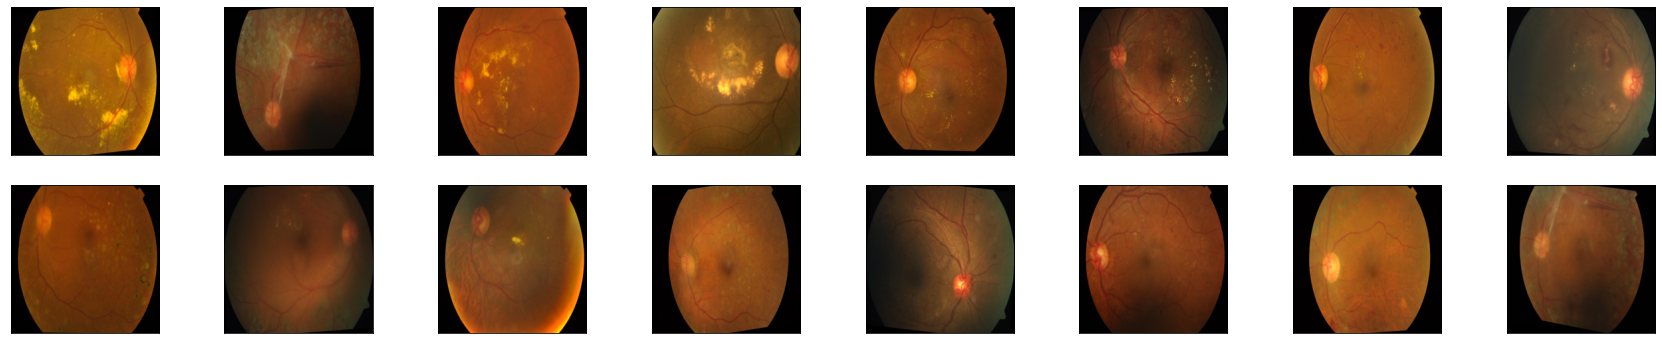

In [14]:
train_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"
fig = plt.figure(figsize=(30, 6))
#print('CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF PROLIFERATIVE DIABETIC RETINOPATHY')
#display 20 images
train_imgs= os.listdir(train_data_dir)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     #RESIZING IMAGES
     resized_img = im.resize((224, 224))  # resize to (224, 224)
     resized_img_arr = np.array(resized_img)
     plt.imshow(resized_img)
print('RESIZING IMAGES TO ABOUT 224x224 PIXELS')

     





In [15]:
#GRAY SCALING

GRAY SCALED IMAGES


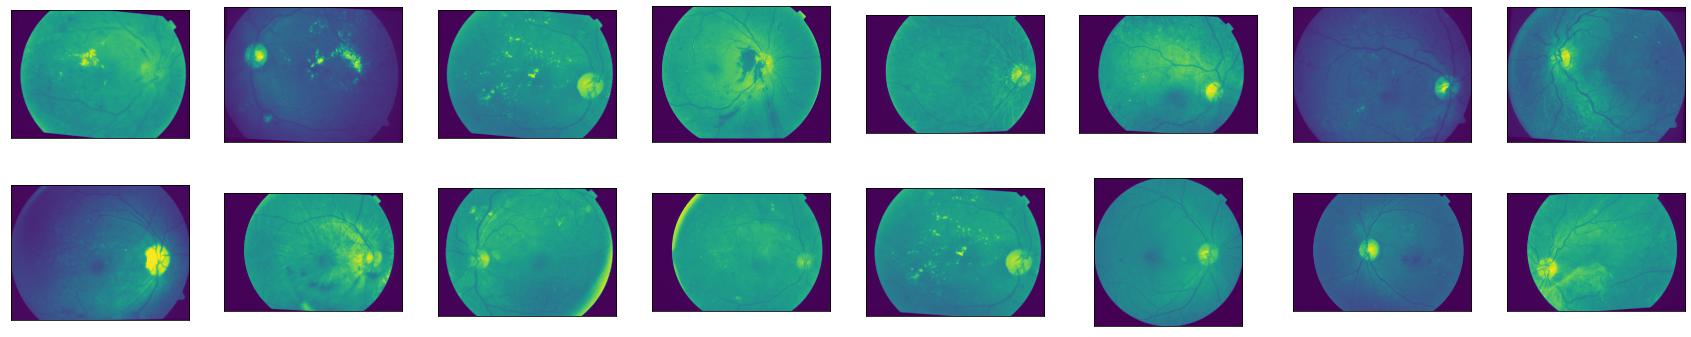

In [16]:
train_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"
fig = plt.figure(figsize=(30, 6))
#print('CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF PROLIFERATIVE DIABETIC RETINOPATHY')
#display 20 images
train_imgs= os.listdir(train_data_dir)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     # Convert the image to grayscale
     gray_img = im.convert('L')

     # Display the grayscale image
     #gray_img.show()
     plt.imshow(gray_img)
print('GRAY SCALED IMAGES')


In [17]:
#IMPLEMENTATION OF SIMPLE NEURAL NETWORK

In [18]:
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)

#Create the base model from the pre-trained model mobilenetv2
model=Sequential()
  
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=IMG_SHAPE))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [19]:
#OPTIMIZATION

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,
                                                beta_1=0.9,
                                                beta_2=0.999,
                                                epsilon=1e-07,
                                                #amsgrad=False,
                                               ),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 8)                 3211272   
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                        

In [21]:
start = datetime.datetime.now()

# main_model_dir= r"C:/DUAEFATIMA/output/"
# model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
# model_file = model_dir + "{epoch:02d}-val_accuracy-{val_accuracy:.2f}-val_loss-{val_loss:.2f}.hdf5"

#save_weights_only=False

epochs = 5
checkpoint = ModelCheckpoint( "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/model.h5",
                             monitor = 'val_accuracy', 
                             verbose=1, save_weights_only=False, 
                             save_best_only=True, mode='max', period=1)

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=50, verbose=1, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                                    factor=0.1,
                                    patience=1,
                                    verbose=1,
                                    mode="auto",
                                    min_delta=0.0001,
                                    cooldown=0,
                                    min_lr=0.001)
# steps_per_epoch = 
# validation_steps = 100
csv_logger = CSVLogger('/content/drive/MyDrive/Colab Notebooks/DR-APTOS/model.h5', separator=',')


print("Training Started at: ",start)
history = model.fit(train_generator,
                              #steps_per_epoch = 1,
                              epochs=epochs,
                              workers=24,
                              #validation_steps=1,
                              validation_data=val_generator, verbose = 1,callbacks = [csv_logger,early, reduce_lr,checkpoint]
                               #validation_data=val_generator, verbose = 1,callbacks = [early, reduce_lr,checkpoint]
                             )
end = datetime.datetime.now()
elapsed= end-start
print ("Time: ", elapsed)

Training Started at:  2023-02-27 09:46:26.251497


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5
132/132 [==============================] - ETA: 0s - loss: 0.6942 - accuracy: 0.4998
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/Colab Notebooks/DR-APTOS/model.h5
132/132 [==============================] - 1377s 10s/step - loss: 0.6942 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/5
132/132 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.50000
132/132 [==============================] - 1349s 10s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/5
132/132 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5000
Epoch 3: val_accuracy did not improve from 0.50000
132/132 [==============================] - 1295s 10s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/5
132/132 [===============

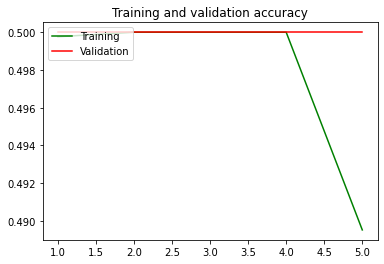

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
legends = ['Training', 'Validation']

plt.plot(epochs, acc, 'g', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(legends, loc='upper left')
#plt.savefig('C:/DUAEFATIMA/fyp_miss_fauzia/model_acc.jpg')

# plt.plot(epochs, loss, 'g', label = 'Training loss')
# plt.plot(epochs, val_loss, 'y', label='Validation loss')

# plt.savefig('C:/DUAEFATIMA/Loss.jpg')

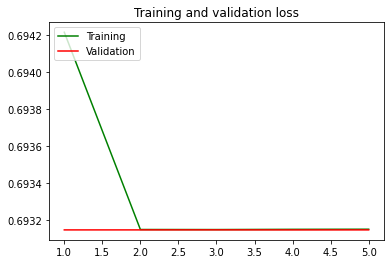

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
legends = ['Training', 'Validation']
epochs = range(1,len(acc)+1)
plt.plot(epochs, loss, 'g', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(legends, loc='upper left')


In [24]:
true_classes = test_generator.classes
class_labels = list(test_generator.classes)
#print(true_classes,class_labels)

In [27]:
start = datetime.datetime.now()
Y_pred = model.predict(test_generator)
end = datetime.datetime.now()
elapsed= end-start
#print ("Time: ", elapsed)
#print(Y_pred)


19/19 [==============================] - 335s 18s/step


In [28]:
binary=[]
for i in range (0,len(Y_pred)):
    if Y_pred[i]<=0.50:
        binary.append(0)
    else:
        binary.append(1)
#print(binary)
cm = confusion_matrix(test_generator.classes, binary)
print(cm)
# y_pred = np.argmax(Y_pred, axis=1)
# #print(y_pred)
# cm = confusion_matrix(test_generator, y_pred)

[[  0 600]
 [  0   0]]


In [29]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print("Sensitivity",TPR)
print("Specificity",TNR)
print("Precision or Positive Predictive Values",PPV)
print("Negative predictive values",NPV)
print("False Positive or Fall Out",FPR)
print("False Negative Rate",FNR)
print("False discovery Rate",FDR)
print("Accuracy",ACC)

Sensitivity [ 0. nan]
Specificity [nan  0.]
Precision or Positive Predictive Values [nan  0.]
Negative predictive values [ 0. nan]
False Positive or Fall Out [nan  1.]
False Negative Rate [ 1. nan]
False discovery Rate [nan  1.]
Accuracy [0. 0.]


<ipython-input-29-69b26020fc6b>:7: RuntimeWarning: invalid value encountered in true_divide
  TPR = TP/(TP+FN)
<ipython-input-29-69b26020fc6b>:9: RuntimeWarning: invalid value encountered in true_divide
  TNR = TN/(TN+FP)
<ipython-input-29-69b26020fc6b>:11: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-29-69b26020fc6b>:13: RuntimeWarning: invalid value encountered in true_divide
  NPV = TN/(TN+FN)
<ipython-input-29-69b26020fc6b>:15: RuntimeWarning: invalid value encountered in true_divide
  FPR = FP/(FP+TN)
<ipython-input-29-69b26020fc6b>:17: RuntimeWarning: invalid value encountered in true_divide
  FNR = FN/(TP+FN)
<ipython-input-29-69b26020fc6b>:19: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


In [30]:
accuracy = accuracy_score(test_generator.classes, binary)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 0.0% 


In [31]:
#TESTING THE MODEL

In [32]:
#MODEL PREDICTIONS

In [33]:
#TESTING FOR FINAL OUTPUT Y
y_test_1=[]
test_path_1='/content/drive/MyDrive/Colab Notebooks/DR-APTOS/test/test_merge/'
#print('LIST OF FILES ARE:',os.listdir(test_path_1))
#0 MEANS THE PERSON HAS NO DIABETIC RETINOPATHY
#1 MEANS THE PERSON HAS DIABETIC RETINOPATHY
for i in os.listdir(test_path_1):
  #print(i)
  if "X_" in i:
    y_test_1.append(0)
    #print('THE PARTICULAR IMAGE IS'+' '+i+' '+'represents PERSON HAS NO DIABETIC RETINOPATHY')

for i in os.listdir(test_path_1):
  #print(i)
  if "Y_" in i:
    y_test_1.append(1)
    #print('THE PARTICULAR IMAGE IS'+' '+i+' '+'represents PERSON HAS DIABETIC RETINOPATHY')
#print(y_test_1)


In [37]:
#PREDICTION FOR FINAL OUTPUT Y
import time
start = datetime.datetime.now()

y_pred_1=[]
test_path_1='/content/drive/MyDrive/Colab Notebooks/DR-APTOS/test/test_merge/'
for i in os.listdir(test_path_1):
    #print(i)
    img=image.load_img(test_path_1+'//'+i,target_size=(224,224))
    img = np.array(img)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    start = datetime.datetime.now()
    #CLASS 0=RDR(predicted probability of class 0 is greater than 0.5)(Model predicts that the image belongs to class 0, and so the code appends the value 1)
    #CLASS 1=NRDR(Predicted probability of class 0 is less than or equal to 0.5)(Model predicts that the image belongs to class 1)(Code appends the value 0)
    #print(label)
    label = model.predict(img)
    #print(label)
    if label[0][0]>0.5:
        #print(label[0][0])
        ##PERSON HAS DIABETIC RETINOPATHY
        y_pred_1.append(1)
        print('THE PARTICULAR IMAGE IS'+' '+i+' '+'represents PERSON HAS  DIABETIC RETINOPATHY')

    else:
        #print(label[0][0])
        #PERSON HAS NO DIABETIC RETINOPATHY
        y_pred_1.append(0)
        print('THE PARTICULAR IMAGE IS'+' '+i+' '+'represents PERSON HAS NO DIABETIC RETINOPATHY')


#end = datetime.datetime.now()
#elapsed= end-start
#print ("Time: ",elapsed)
#print(len(y_pred_1))
print(y_pred_1)


1/1 [==============================] - 0s 52ms/step
THE PARTICULAR IMAGE IS X_Aptos_19_1_2d9d97a6e713.jpg represents PERSON HAS  DIABETIC RETINOPATHY
1/1 [==============================] - 0s 54ms/step
THE PARTICULAR IMAGE IS X_Aptos_19_1_4c3c1ed09771.jpg represents PERSON HAS  DIABETIC RETINOPATHY
1/1 [==============================] - 0s 56ms/step
THE PARTICULAR IMAGE IS X_Aptos_19_1_17eff993386f.jpg represents PERSON HAS  DIABETIC RETINOPATHY
1/1 [==============================] - 0s 52ms/step
THE PARTICULAR IMAGE IS X_Aptos_19_1_07a1c7073982.jpg represents PERSON HAS  DIABETIC RETINOPATHY
1/1 [==============================] - 0s 55ms/step
THE PARTICULAR IMAGE IS X_Aptos_19_1_172df1330a60.jpg represents PERSON HAS  DIABETIC RETINOPATHY
1/1 [==============================] - 0s 60ms/step
THE PARTICULAR IMAGE IS X_Aptos_19_1_3ee17aa12e46.jpg represents PERSON HAS  DIABETIC RETINOPATHY
1/1 [==============================] - 0s 95ms/step
THE PARTICULAR IMAGE IS X_Aptos_19_1_0eb52045349

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

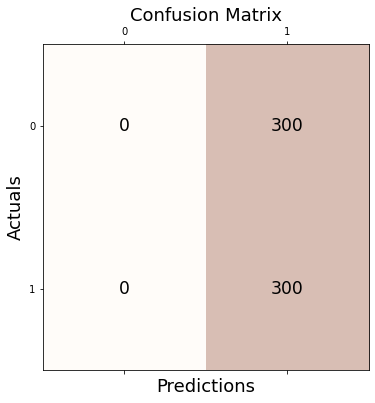

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# Calculate the confusion matrix_1
print(y_test_1)
# print(y_pred_1)
print(len(y_test_1))
print(len(y_pred_1))
conf_matrix = confusion_matrix(y_test_1,y_pred_1)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



In [40]:
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN =conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# f1-score 
F1 = 2 * (PPV * TPR) / (PPV + TPR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print("Sensitivity",TPR)
print("Specificity",TNR)
print("Precision or Positive Predictive Values",PPV)
print("Negative predictive values",NPV)
print("False Positive or Fall Out",FPR)
print("False Negative Rate",FNR)
print("False discovery Rate",FDR)
print("Accuracy",ACC)
print("f1score",F1)

Sensitivity [0. 1.]
Specificity [1. 0.]
Precision or Positive Predictive Values [nan 0.5]
Negative predictive values [0.5 nan]
False Positive or Fall Out [0. 1.]
False Negative Rate [1. 0.]
False discovery Rate [nan 0.5]
Accuracy [0.5 0.5]
f1score [       nan 0.66666667]


<ipython-input-40-1773964bc858>:11: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-40-1773964bc858>:13: RuntimeWarning: invalid value encountered in true_divide
  NPV = TN/(TN+FN)
<ipython-input-40-1773964bc858>:19: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


In [41]:
accuracy = accuracy_score(y_test_1, y_pred_1)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 50.0% 


In [42]:
target= ['level_0', "level_1"]

report = classification_report(y_test_1, y_pred_1, target_names=target)
print(report)

              precision    recall  f1-score   support

     level_0       0.00      0.00      0.00       300
     level_1       0.50      1.00      0.67       300

    accuracy                           0.50       600
   macro avg       0.25      0.50      0.33       600
weighted avg       0.25      0.50      0.33       600



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
F1 = 2 * (PPV * TPR) / (PPV + TPR)

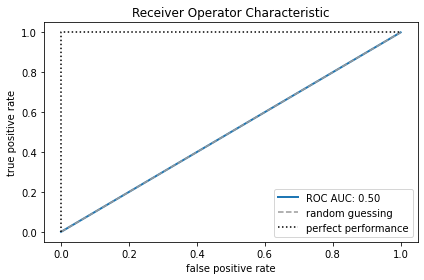

In [44]:
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_1, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw = 2, label = 'ROC AUC: {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color = (0.6, 0.6, 0.6),
         label = 'random guessing')
plt.plot([0, 0, 1], [0, 1, 1],
         linestyle = ':',
         color = 'black', 
         label = 'perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()
#plt.savefig('C:/DUAEFATIMA/work_2/messidor_experiments/densnet/messi_densenet_roc_auc.jpg')

In [ ]:
#VISUALIZATION

In [ ]:
#COUNTING THE NUMBER OF DIATEBETIC RETINOPATHY PATIENTS BELONGING TO EACH CLASSES

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


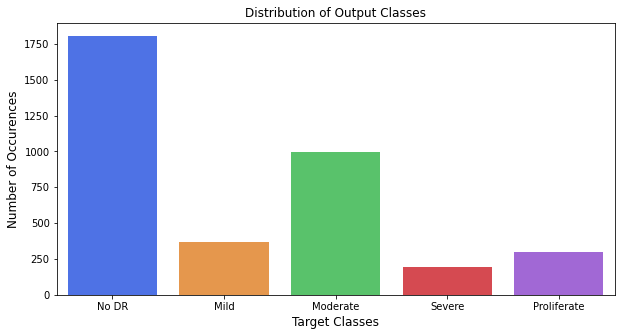

In [45]:
counts=train_csv['diagnosis'].value_counts()
class_list=['No DR','Mild','Moderate','Severe','Proliferate']
for i,x in enumerate(class_list):
    counts[x] = counts.pop(i)

plt.figure(figsize=(10,5))
sns.barplot(counts.index, counts.values,alpha=0.8,palette='bright')
plt.title('Distribution of Output Classes')
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Target Classes',fontsize=12)
plt.show()


In [ ]:
#VISUALIZING TRAINING DATA

In [46]:
train_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"

In [47]:
train_data_dir1 = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Nrdr"

CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF PROLIFERATIVE DIABETIC RETINOPATHY


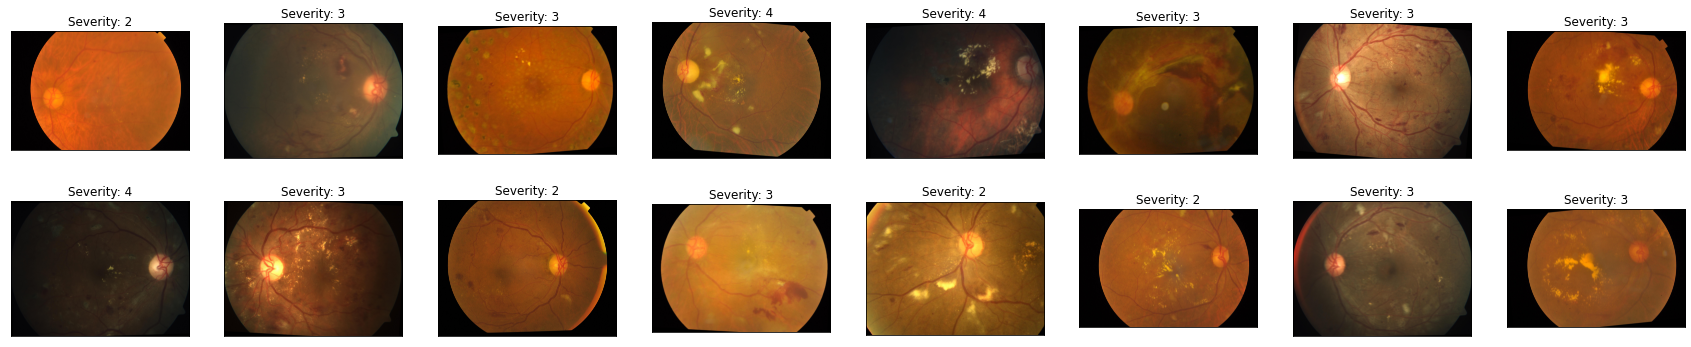

In [48]:
fig = plt.figure(figsize=(30, 6))
print('CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF PROLIFERATIVE DIABETIC RETINOPATHY')
#display 16 images
train_imgs= os.listdir(train_data_dir)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     plt.imshow(im)
     #print(len(img.split('.')[0]))
     l.append(img.split('.')[0])
     #print('l is:',l)
     #print('len of l:',len(l))
     for i in l:
     #print('i is:',i)
         if 'shear' in i:
             s=i[19]+i[20]+i[21]+i[22]+i[23]+i[24]+i[25]+i[26]+i[27]+i[28]+i[29]+i[30]
             m.append(s)
         elif 'shear' not in i:
             t=i[11]+i[12]+i[13]+i[14]+i[15]+i[16]+i[17]+i[18]+i[19]+i[20]+i[21]+i[22]
             m.append(t)
 
     for q in m:
         # check if image exists in train_csv
         if q in train_csv['id_code'].values:
            lab = train_csv.loc[train_csv['id_code'] == q, 'diagnosis'].values[0]
         else:
            lab = "Unknown"
         ax.set_title('Severity: %s'%lab)
     
#print('Modified string:',m)
#print('Strings is:',l)

     

            
           
               

In [49]:
#VISUALIZING TRAINING DATA ON NON PROLIFERATIVE DIABETIC RETINOPATHY

CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF NON PROLIFERATIVE DIABETIC RETINOPATHY


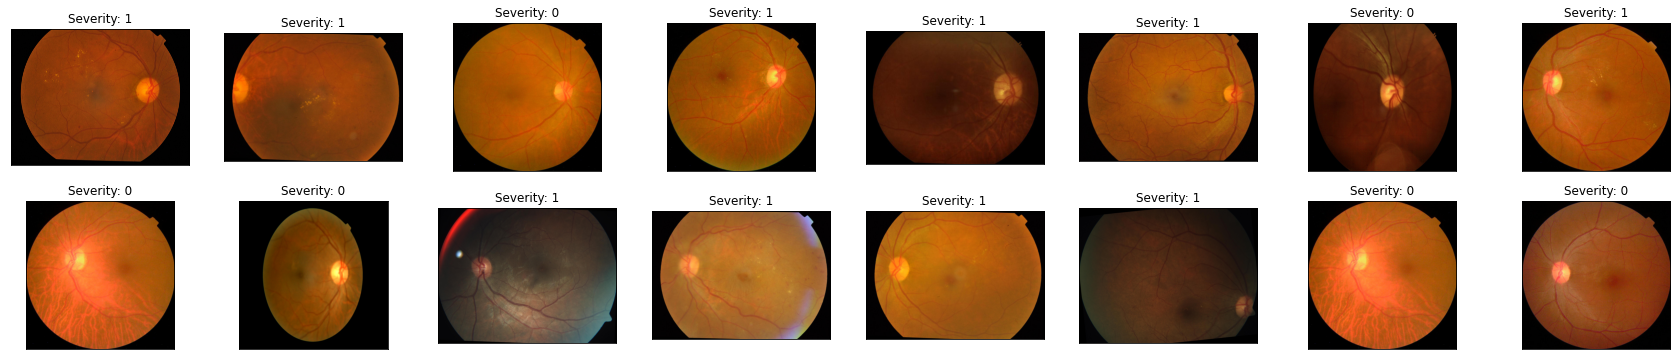

In [50]:
fig = plt.figure(figsize=(30, 6))
print('CHECKING THE SEVERITY OF DIABETES ON TRAIN SET OF NON PROLIFERATIVE DIABETIC RETINOPATHY')
#display 16 images
train_imgs= os.listdir(train_data_dir1)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Nrdr"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     plt.imshow(im)
     #print(len(img.split('.')[0]))
     l.append(img.split('.')[0])
     #print('l is:',l)
     #print('len of l:',len(l))
     for i in l:
     #print('i is:',i)
         if 'shear' in i:
             s=i[19]+i[20]+i[21]+i[22]+i[23]+i[24]+i[25]+i[26]+i[27]+i[28]+i[29]+i[30]
             m.append(s)
         elif 'shear' not in i:
             t=i[11]+i[12]+i[13]+i[14]+i[15]+i[16]+i[17]+i[18]+i[19]+i[20]+i[21]+i[22]
             m.append(t)
 
     for q in m:
         # check if image exists in train_csv
         if q in train_csv['id_code'].values:
            lab = train_csv.loc[train_csv['id_code'] == q, 'diagnosis'].values[0]
         else:
            lab = "Unknown"
         ax.set_title('Severity: %s'%lab)
     
#print('Modified string:',m)
#print('Strings is:',l)


In [51]:
#VISUALIZING VALIDATION DATA ON NON PROLIFERATIVE DIABETIC RETINOPATHY

In [52]:
val_data_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid/Nrdr"
val_data_dir1 = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid/Rdr"

CHECKING THE SEVERITY OF DIABETES ON VALIDATION SET OF NON PROLIFERATIVE DIABETIC RETINOPATHY


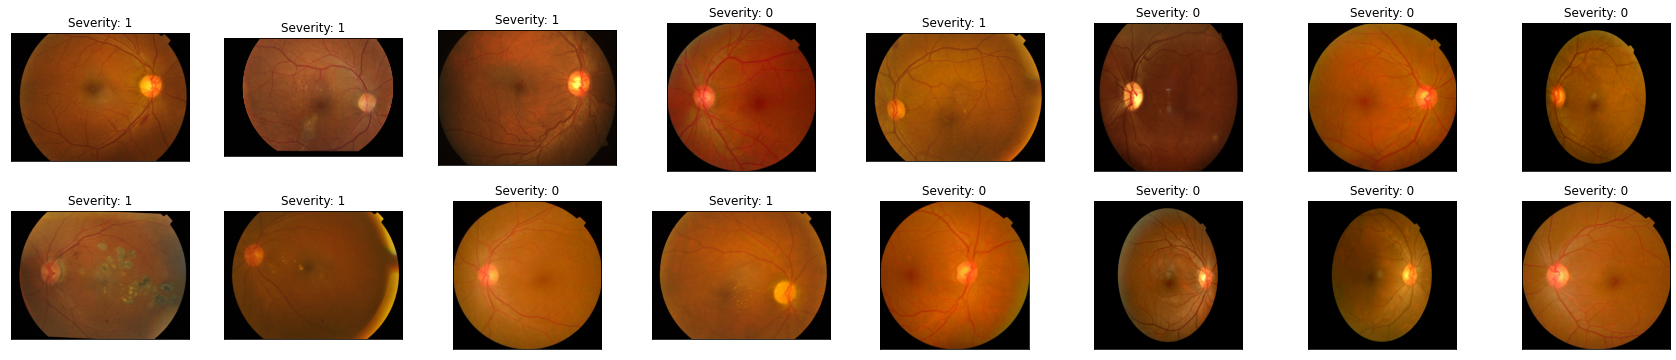

In [53]:
fig = plt.figure(figsize=(30, 6))
print('CHECKING THE SEVERITY OF DIABETES ON VALIDATION SET OF NON PROLIFERATIVE DIABETIC RETINOPATHY')
#display 16 images
train_imgs= os.listdir(val_data_dir)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid/Nrdr"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     plt.imshow(im)
     #print(len(img.split('.')[0]))
     l.append(img.split('.')[0])
     #print('l is:',l)
     #print('len of l:',len(l))
     for i in l:
     #print('i is:',i)
         if 'shear' in i:
             s=i[19]+i[20]+i[21]+i[22]+i[23]+i[24]+i[25]+i[26]+i[27]+i[28]+i[29]+i[30]
             m.append(s)
         elif 'shear' not in i:
             t=i[11]+i[12]+i[13]+i[14]+i[15]+i[16]+i[17]+i[18]+i[19]+i[20]+i[21]+i[22]
             m.append(t)
 
     for q in m:
         # check if image exists in train_csv
         if q in train_csv['id_code'].values:
            lab = train_csv.loc[train_csv['id_code'] == q, 'diagnosis'].values[0]
         else:
            lab = "Unknown"
         ax.set_title('Severity: %s'%lab)
     
#print('Modified string:',m)
#print('Strings is:',l)

CHECKING THE SEVERITY OF DIABETES ON VALIDATION SET OF PROLIFERATIVE DIABETIC RETINOPATHY


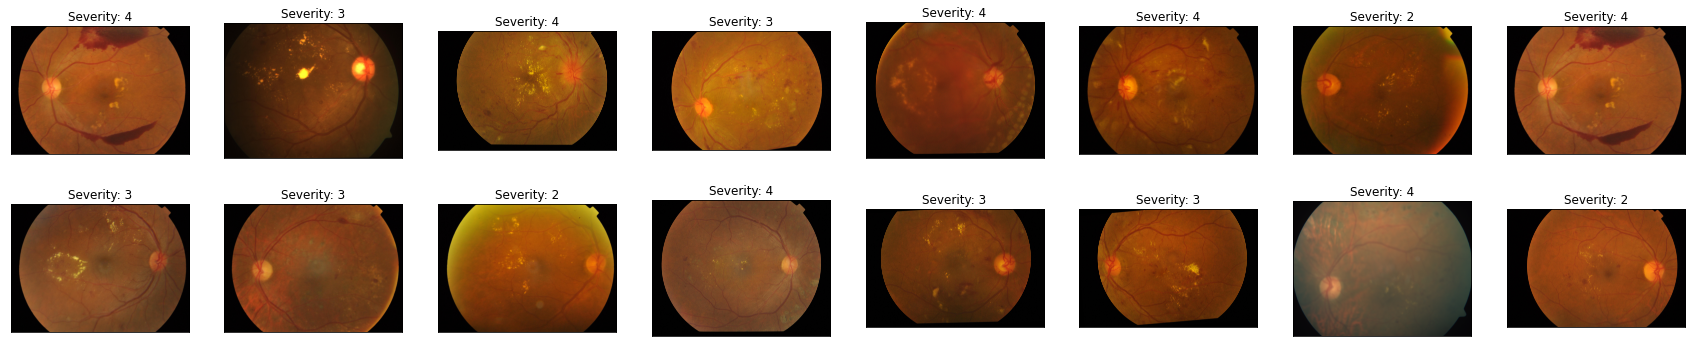

In [54]:
fig = plt.figure(figsize=(30, 6))
print('CHECKING THE SEVERITY OF DIABETES ON VALIDATION SET OF PROLIFERATIVE DIABETIC RETINOPATHY')
#display 16 images
train_imgs= os.listdir(val_data_dir1)
l=[]#taking all images path
m=[]#taking the image path which contains 'shear' only
for idx,img in enumerate(np.random.choice(train_imgs, 16)):
     img_dir = train_imgs
     ax = fig.add_subplot(2,16//2, idx+1 , xticks=[] ,yticks=[])
     # set image filename and directory path
     img_filename = img
     img_dir = "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid/Rdr"
     # construct full file path
     file_path = img_dir +'/'+ img_filename
     # open image using PIL
     im = Image.open(file_path)
     plt.imshow(im)
     #print(len(img.split('.')[0]))
     l.append(img.split('.')[0])
     #print('l is:',l)
     #print('len of l:',len(l))
     for i in l:
     #print('i is:',i)
         if 'shear' in i:
             s=i[19]+i[20]+i[21]+i[22]+i[23]+i[24]+i[25]+i[26]+i[27]+i[28]+i[29]+i[30]
             m.append(s)
         elif 'shear' not in i:
             t=i[11]+i[12]+i[13]+i[14]+i[15]+i[16]+i[17]+i[18]+i[19]+i[20]+i[21]+i[22]
             m.append(t)
 
     for q in m:
         # check if image exists in train_csv
         if q in train_csv['id_code'].values:
            lab = train_csv.loc[train_csv['id_code'] == q, 'diagnosis'].values[0]
         else:
            lab = "Unknown"
         ax.set_title('Severity: %s'%lab)
     
#print('Modified string:',m)
#print('Strings is:',l)